<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# NASA - Classify Exoplanet by Light Curves 
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/NASA/NASA_Artic_sea_ice.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/Open_in_Naas_Lab.svg"/></a><br><br><a href="https://github.com/jupyter-naas/awesome-notebooks/issues/new?assignees=&labels=&template=template-request.md&title=Tool+-+Action+of+the+notebook+">Template request</a> | <a href="https://github.com/jupyter-naas/awesome-notebooks/issues/new?assignees=&labels=bug&template=bug_report.md&title=NASA+-+Artic+sea+ice:+Error+short+description">Bug report</a> | <a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Naas/Naas_Start_data_product.ipynb" target="_parent">Generate Data Product</a>

**Tags:** #nasa #naas #opendata #analytics #astronomy #html #png #operations #image #pylab

**Author:** [Mardiat-Iman](https://www.linkedin.com/in/mardiat-iman-ibrahim-imam-726027262)

**Description:** This notebook is classifying Exoplanet in a given data set using light curves and flux (brightness). An exoplanet is any planet beyond our solar system. Most orbit other stars, but free-floating exoplanets, called rogue planets, orbit the galactic center and are untethered to any star.<br>


**References:**
- Data source: Satellite observations. Credit: /NASA
- [Classify Exoplanet by Light Curves](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data)

## Input

### Import libraries

In [5]:
import pandas as pd
import numpy as np
%pylab inline
import naas

Populating the interactive namespace from numpy and matplotlib


### Setup Variables
- `flux_data`: source data in CSV. The "FLUX" column represents the brightness of the star

In [6]:
flux_data = 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTest.csv'

## Model

### Get Data
- column LABEL is to identify if it's an exoplanet or not (1 is exoplanet and 2...)
- column FLUX.X represents the brighnest

In [7]:
df = pd.read_csv(flux_data)
print("Row fetched:", len(df))
df.tail(12)

Row fetched: 570


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
558,1,53.91,46.59,50.30,32.19,48.64,-21.02,5.50,-18.97,15.73,...,-2.33,-13.05,-77.58,-135.28,-167.74,-175.05,6.15,20.34,-11.39,-20.99
559,1,-6.30,-2.86,0.95,-6.69,-2.61,-4.65,-7.27,-0.96,0.26,...,-4.28,-4.68,-3.62,-1.01,4.56,-2.73,-15.31,-9.48,-8.23,-4.95
560,1,5.66,7.83,-4.39,-0.62,-5.23,0.34,-13.64,-11.26,-9.96,...,15.15,24.89,23.41,26.33,44.37,46.15,37.28,45.60,41.66,39.35
561,1,4.36,2.22,5.61,-1.44,-0.05,-0.22,1.28,-13.20,-5.83,...,2.94,-2.90,2.12,11.26,12.81,6.03,-6.13,-10.46,-5.36,-14.23
562,1,-79.95,-79.13,-81.07,-72.25,-79.71,-70.60,-90.33,-88.66,-68.15,...,5.40,19.51,-0.15,1.67,3.20,7.25,-8.25,-7.91,4.45,6.58
563,1,-63.42,-59.78,-64.16,-61.07,-41.74,-58.99,-35.94,-43.15,-24.87,...,-13.98,0.62,-5.53,-14.26,-23.69,-37.84,-2.37,6.62,12.02,2.33
564,1,144.47,20.09,147.47,109.18,100.87,24.87,115.03,106.37,48.87,...,-57.53,-41.94,-165.94,-265.13,-263.35,-376.53,-176.22,-152.07,-216.60,-202.97
565,1,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,1,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,1,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70


### Create graph
The graph represents specific data from the data set giving a graphical representation of the data and the light curve it creates depending on how much exo_data you want represented.

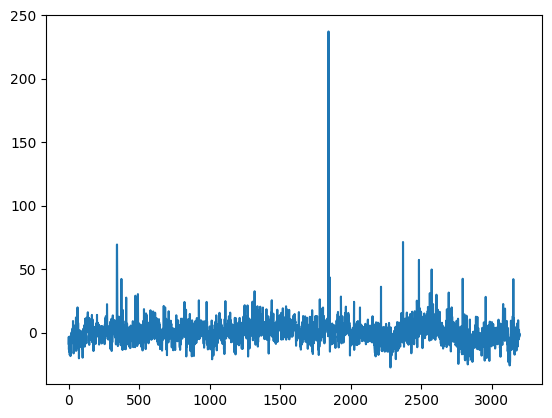

In [11]:
labels = df['LABEL']
flux_data = df.drop('LABEL',axis=1) #drop the labels from the data frame, leaving only the flux data
# print(labels)

non_exo_data=flux_data.loc[labels==2] 
exo_data=flux_data.loc[labels==1]  
# print(exo_data)

def plot_light_curve(dataset, index):
    plt.figure()
    plt.plot(np.array(dataset[index:index+1])[0])
    plt.show()
    
for i in range(1):#the number in the bracket is how many times plots of the light curve you want.
    plot_light_curve(exo_data, 510) #the number is the dataset you want transformed into a light curve

## Output

### Save and share output

In [9]:
print(len(exo_data))
(len(non_exo_data))

565


5